<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/57_Day_ElasticNet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd


In [181]:
X,y= load_diabetes(return_X_y=True)


In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=77)

In [183]:
#  LR
lr=LinearRegression()
lr.fit(X_train,y_train)
from sklearn.metrics import r2_score

r2_score(y_test,lr.predict(X_test))

0.5034013787630967

In [184]:
# Ridge

r2=[]
alpha=[]
def Rid(max_alpha):
  for i in range(0,max_alpha):
    i=0.00005*i # scale down the i bec i is integer
    alpha.append(i)
    r=Ridge(i)
    r.fit(X_train,y_train)
    r2.append(r2_score(y_test,r.predict(X_test)))

max_alpha=0.1
Rid(int(max_alpha/0.00001))

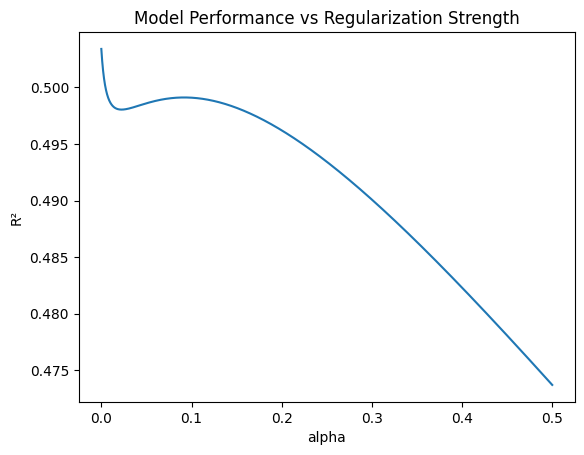

In [185]:
import matplotlib.pyplot as plt
plt.plot(alpha, r2)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.title('Model Performance vs Regularization Strength')
plt.show()

In [186]:
# lasso
r2=[]
alpha=[]
def las(max_alpha):
  for i in range(0,max_alpha):
    i=0.00005*i # scale down the i bec i is integer
    alpha.append(i)
    r=Ridge(i)
    r.fit(X_train,y_train)
    r2.append(r2_score(y_test,r.predict(X_test)))

max_alpha=0.1
las(int(max_alpha/0.00001))


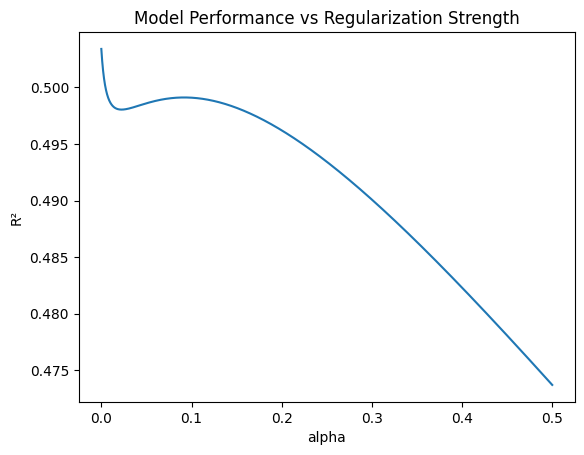

In [187]:
plt.plot(alpha, r2)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.title('Model Performance vs Regularization Strength')
plt.show()

no overfitting in this data

In [188]:
# ElasticNet

def ENT(alpha,l1_ratio):
    r=ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
    r.fit(X_train,y_train)
    print("alpha= " , alpha , "l1= " ,l1_ratio ,"r2= " ,r2_score(y_test,r.predict(X_test)))

alpha=np.array([0.0001,0.001,0.01,0.1])
l1=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    # l1=1 ridge ho jayega l1=0 lasso

for i in range(alpha.size):
  for j in range(l1.size):
    ENT(alpha[i],l1[j])



alpha=  0.0001 l1=  0.1 r2=  0.4981583714736364
alpha=  0.0001 l1=  0.2 r2=  0.49809324496586216
alpha=  0.0001 l1=  0.3 r2=  0.4980504812187674
alpha=  0.0001 l1=  0.4 r2=  0.49804441171461133
alpha=  0.0001 l1=  0.5 r2=  0.49809805091793935
alpha=  0.0001 l1=  0.6 r2=  0.49825043123669455
alpha=  0.0001 l1=  0.7 r2=  0.4985725989113434
alpha=  0.0001 l1=  0.8 r2=  0.49916467852060953
alpha=  0.0001 l1=  0.9 r2=  0.5004240266201523
alpha=  0.0001 l1=  1.0 r2=  0.5032881680038783
alpha=  0.001 l1=  0.1 r2=  0.4887908816926603
alpha=  0.001 l1=  0.2 r2=  0.49130350832921754
alpha=  0.001 l1=  0.3 r2=  0.4935922438983852
alpha=  0.001 l1=  0.4 r2=  0.4955972204918385
alpha=  0.001 l1=  0.5 r2=  0.4972434564053566
alpha=  0.001 l1=  0.6 r2=  0.4984374044649156
alpha=  0.001 l1=  0.7 r2=  0.4990643390711986
alpha=  0.001 l1=  0.8 r2=  0.499001328212896
alpha=  0.001 l1=  0.9 r2=  0.4982705591062364
alpha=  0.001 l1=  1.0 r2=  0.5022526500163318
alpha=  0.01 l1=  0.1 r2=  0.2996372789113375

# for find best alpha

In [190]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [191]:
# RidgeCV
ridge_model = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=5)
ridge_model.fit(X_train, y_train)
ridge_r2 = r2_score(y_test, ridge_model.predict(X_test))

# LassoCV
lasso_model = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=5)
lasso_model.fit(X_train, y_train)
lasso_r2 = r2_score(y_test, lasso_model.predict(X_test))

# ElasticNetCV
elastic_model = ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], l1_ratio=[0.1, 0.5, 0.9, 1], cv=5)
elastic_model.fit(X_train, y_train)
elastic_r2 = r2_score(y_test, elastic_model.predict(X_test))

ridge_r2, lasso_r2, elastic_r2

(0.49909235389558604, 0.49745126112002724, 0.49745126112002724)